In [35]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd

from peekingduck.training.src.utils.general_utils import (
    create_dataframe_with_image_info,
    download_to,
    extract_file,
    return_list_of_files,
)


In [36]:
train_dir: Path = Path("data/vegfru5")
train_images = return_list_of_files(
    train_dir, extensions=[".jpg", ".png", ".jpeg"], return_string=False
)


In [37]:
len(train_images)

0

In [38]:
df = pd.read_csv("data/vegfru/supvegfru_all.csv", delimiter=" ") # supvegfru_train.csv sub_classes.csv supvegfru_all.csv

In [39]:
df

,image_path,class_id
0,veg200_images/Chinese_artichoke/v_14_01_0001.jpg,13
1,veg200_images/Chinese_artichoke/v_14_01_0002.jpg,13
2,veg200_images/Chinese_artichoke/v_14_01_0003.jpg,13
3,veg200_images/Chinese_artichoke/v_14_01_0004.jpg,13
4,veg200_images/Chinese_artichoke/v_14_01_0005.jpg,13
...,...,...
160726,fru92_images/yacon/f_08_02_0419.jpg,24
160727,fru92_images/yacon/f_08_02_0420.jpg,24
160728,fru92_images/yacon/f_08_02_0421.jpg,24
160729,fru92_images/yacon/f_08_02_0422.jpg,24


In [40]:
df['image_path'] = df["image_path"].astype(str).apply(lambda x: "/".join(["data","vegfru",x]))

In [41]:
df

,image_path,class_id
0,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
1,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
2,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
3,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
4,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
...,...,...
160726,data/vegfru/fru92_images/yacon/f_08_02_0419.jpg,24
160727,data/vegfru/fru92_images/yacon/f_08_02_0420.jpg,24
160728,data/vegfru/fru92_images/yacon/f_08_02_0421.jpg,24
160729,data/vegfru/fru92_images/yacon/f_08_02_0422.jpg,24


In [42]:
df['class_name'] = df["image_path"].astype(str).apply(lambda x: Path(x).parent.name)

In [43]:
df["class_name"].value_counts()

eggplant                       1807
papaya                         1614
mango                          1474
grape                          1425
garlic                         1420
                               ... 
Herb_of_Ghostplant_Wormwood     204
water_shield                    204
kalimeris                       203
termite_mushroom                202
prickly_lettuce                 201
Name: class_name, Length: 292, dtype: int64

In [44]:
classes = [image.parent.name for image in train_images]

In [45]:
set(classes)

set()

In [46]:
list(range(0,5))

[0, 1, 2, 3, 4]

In [47]:
vegfru5 = df.loc[
    df["class_name"].isin(
        [
            "garlic",
            "cattail",
            "soybean",
            "red_cabbage",
            "mung_bean_sprouts",
            "pakchoi",
            "eggplant",
            "chrysanthemum",
            "snake_gourd",
            "nameko",
        ]
    )
]


In [48]:
["garlic","cattail","soybean","red_cabbage","mung_bean_sprouts"]

['garlic', 'cattail', 'soybean', 'red_cabbage', 'mung_bean_sprouts']

/var/folders/p4/kcmtkxw53z54k341vwwykts80000gn/T/ipykernel_69732/464067974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegfru5.sort_values(by="class_name", inplace=True)


<AxesSubplot: >

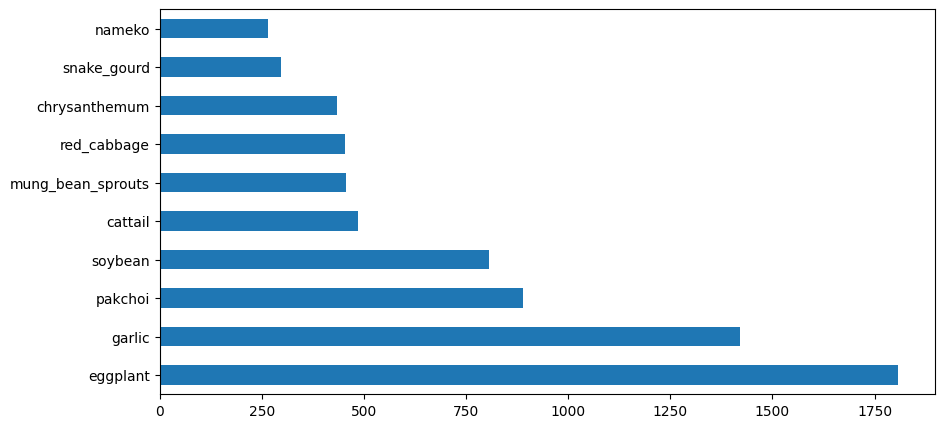

In [49]:
vegfru5.sort_values(by="class_name", inplace=True)
vegfru5["class_name"].value_counts().plot(kind='barh',figsize=(10,5))

In [50]:
vegfru5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7312 entries, 4700 to 93396
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7312 non-null   object
 1   class_id    7312 non-null   int64 
 2   class_name  7312 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [52]:
vegfru5.sort_values(by="class_id", inplace=True)

/var/folders/p4/kcmtkxw53z54k341vwwykts80000gn/T/ipykernel_69732/3366390297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegfru5.sort_values(by="class_id", inplace=True)


<AxesSubplot: >

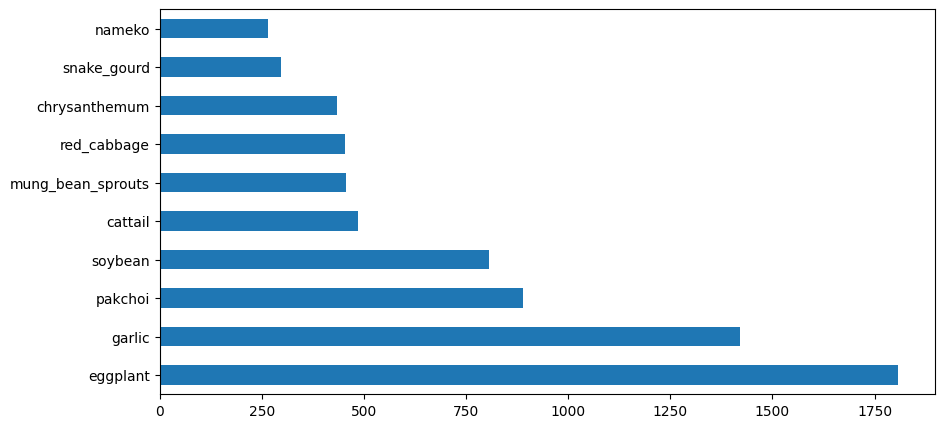

In [53]:
vegfru5["class_name"].value_counts().plot(kind='barh',figsize=(10,5))


In [54]:
vegfru5.to_csv('vegfru10.csv', index=False)